In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ecommerce-data/data.csv


# Objective¶
****The goal of this analysis is to segment customers using the  RFM (Recency, Frequency, Monetary) analysis. This segmentation helps in understanding customer behavior, identifying high-value customers, and tailoring marketing strategies accordingly.****

In [2]:
from datetime import datetime 
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/kaggle/input/ecommerce-data/data.csv", encoding='unicode_escape')

In [3]:
print(df.shape)
print(df.columns)

(541909, 8)
Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


**Data Cleaning**

In [6]:
#Parsing Dates
#date_lengths=16 :12/12/2010 12:26
#date_lengths=15 :12/12/2010 8:26
#date_lengths=14 :12/1/2010 8:26
#date_lengths=13 :1/1/2010 8:26
date_lengths = df.InvoiceDate.str.len()
date_lengths.value_counts()

InvoiceDate
15    301446
16    118449
14    114913
13      7101
Name: count, dtype: int64

In [7]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format="%m/%d/%Y %H:%M")
df["Invoice_Date"] = df["InvoiceDate"].dt.strftime("%m/%d/%Y")
df["Invoice_Time"] = df["InvoiceDate"].dt.strftime("%H:%M")

In [8]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Date,Invoice_Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12/01/2010,08:26
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12/01/2010,08:26
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12/01/2010,08:26
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12/01/2010,08:26
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12/01/2010,08:26


In [9]:
#Check the duplicate values in df
print(df.duplicated().sum())
df[df.duplicated()==True]

5268


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Date,Invoice_Time
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom,12/01/2010,11:45
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom,12/01/2010,11:45
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom,12/01/2010,11:45
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom,12/01/2010,11:45
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom,12/01/2010,11:49
...,...,...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom,12/09/2011,11:34
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom,12/09/2011,11:34
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom,12/09/2011,11:34
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom,12/09/2011,11:34


In [10]:
df = df.drop_duplicates()
print(df.duplicated().sum())

0


In [11]:
#Data Cleaing: Missing Value
print(df.isnull().sum())

InvoiceNo            0
StockCode            0
Description       1454
Quantity             0
InvoiceDate          0
UnitPrice            0
CustomerID      135037
Country              0
Invoice_Date         0
Invoice_Time         0
dtype: int64


In [12]:
df=df.dropna()
print(df.isnull().sum())

InvoiceNo       0
StockCode       0
Description     0
Quantity        0
InvoiceDate     0
UnitPrice       0
CustomerID      0
Country         0
Invoice_Date    0
Invoice_Time    0
dtype: int64


In [13]:
#Check the unique of the 'country'
uni_country = df['Country'].unique()
uni_country = sorted(uni_country)
print(uni_country)

['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brazil', 'Canada', 'Channel Islands', 'Cyprus', 'Czech Republic', 'Denmark', 'EIRE', 'European Community', 'Finland', 'France', 'Germany', 'Greece', 'Iceland', 'Israel', 'Italy', 'Japan', 'Lebanon', 'Lithuania', 'Malta', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'RSA', 'Saudi Arabia', 'Singapore', 'Spain', 'Sweden', 'Switzerland', 'USA', 'United Arab Emirates', 'United Kingdom', 'Unspecified']


In [14]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,401604.0,12.183273,-80995.0,2.0,5.0,12.0,80995.0,250.283037
InvoiceDate,401604,2011-07-10 12:08:23.848567552,2010-12-01 08:26:00,2011-04-06 15:02:00,2011-07-29 15:40:00,2011-10-20 11:58:30,2011-12-09 12:50:00,NaN
UnitPrice,401604.0,3.474064,0.0,1.25,1.95,3.75,38970.0,69.764035
CustomerID,401604.0,15281.160818,12346.0,13939.0,15145.0,16784.0,18287.0,1714.006089


In [15]:
df.describe(include = 'O').T

,count,unique,top,freq
InvoiceNo,401604,22190,576339,542
StockCode,401604,3684,85123A,2065
Description,401604,3896,WHITE HANGING HEART T-LIGHT HOLDER,2058
Country,401604,37,United Kingdom,356728
Invoice_Date,401604,305,12/05/2011,3359
Invoice_Time,401604,773,13:35,1810


In [16]:
df["CustomerID"].nunique()

4372

In [17]:
#Calculating the TotalPrice per order (UnitPrice and Quantity)
df["TotalPrice"] = df["Quantity"]*df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Date,Invoice_Time,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12/01/2010,08:26,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12/01/2010,08:26,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12/01/2010,08:26,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12/01/2010,08:26,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12/01/2010,08:26,20.34


In [18]:
#Find out the number of orders for each country separately.
country_mask = df.groupby(['Country', 'InvoiceNo']).size().reset_index(name='order_count')
country_order = country_mask.groupby('Country').agg(order_count=('order_count', 'count')).sort_values(by='order_count', ascending=False)
print(country_order)

                      order_count
Country                          
United Kingdom              19857
Germany                       603
France                        458
EIRE                          319
Belgium                       119
Spain                         105
Netherlands                   101
Switzerland                    71
Portugal                       70
Australia                      69
Italy                          55
Finland                        48
Sweden                         46
Norway                         40
Channel Islands                33
Japan                          28
Poland                         24
Denmark                        21
Cyprus                         20
Austria                        19
Malta                          10
Singapore                      10
Unspecified                     8
Iceland                         7
USA                             7
Israel                          6
Greece                          6
Canada        

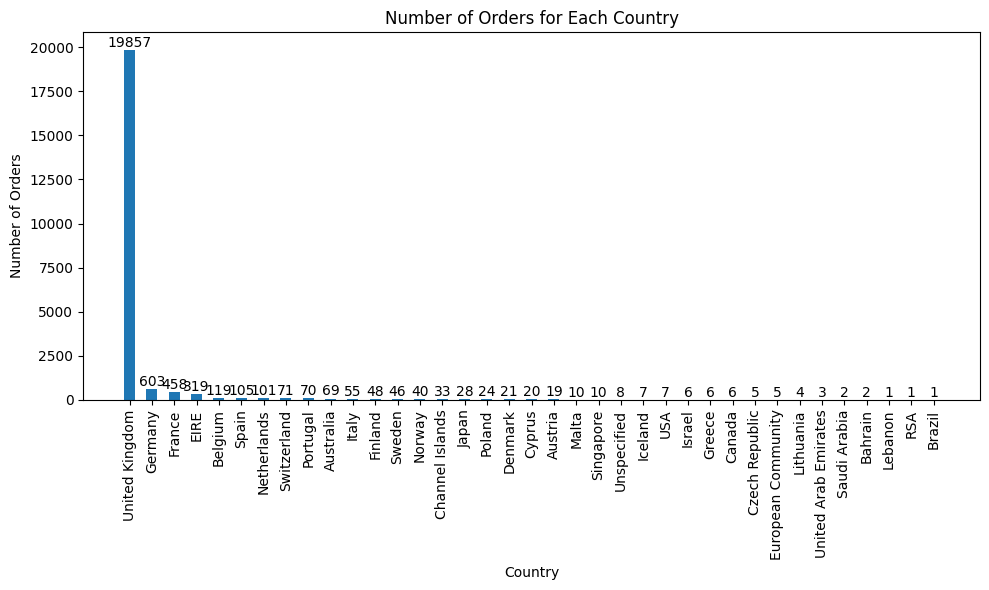

In [19]:
# Visualizing the number of orders for each country using a bar plot.
# Set the figure size and define the width of the bars.
plt.figure(figsize=(10, 6))
bar_width = 0.5
# drawing the plot
plt.bar(np.arange(len(country_order.index)), country_order['order_count'], width=bar_width)

for i, value in enumerate(country_order['order_count']):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')

# title and label
plt.title('Number of Orders for Each Country')
plt.xlabel('Country')
plt.ylabel('Number of Orders')

plt.xticks(np.arange(len(country_order.index)), country_order.index, rotation=90)

plt.tight_layout()
plt.show()

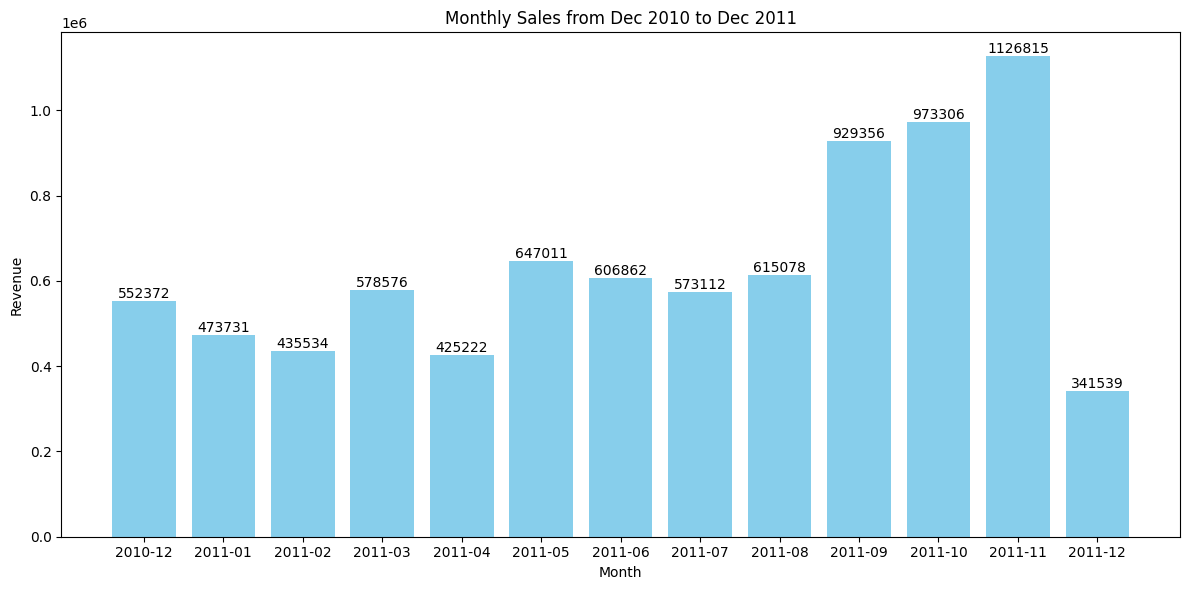

In [20]:
#Find out the total sales per month
df['Invoice_Date'] = pd.to_datetime(df['Invoice_Date'])
df['Month'] = df['Invoice_Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['TotalPrice'].sum()
x_labels = monthly_sales.index.strftime('%Y-%m')
######################################################
plt.figure(figsize=(12, 6))
bars = plt.bar(x_labels, monthly_sales, color='skyblue')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')
plt.title('Monthly Sales from Dec 2010 to Dec 2011')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [21]:
print(monthly_sales)

Month
2010-12     552372.860
2011-01     473731.900
2011-02     435534.070
2011-03     578576.210
2011-04     425222.671
2011-05     647011.670
2011-06     606862.520
2011-07     573112.321
2011-08     615078.090
2011-09     929356.232
2011-10     973306.380
2011-11    1126815.070
2011-12     341539.430
Freq: M, Name: TotalPrice, dtype: float64


In [22]:
#Top 10 products
product_grouped = df.groupby('Description')
quantity_product = product_grouped.agg({'Quantity':'sum'})
quantity_product_top10 = quantity_product.nlargest(10, 'Quantity')
print(quantity_product_top10)

                                    Quantity
Description                                 
WORLD WAR 2 GLIDERS ASSTD DESIGNS      53119
JUMBO BAG RED RETROSPOT                44963
ASSORTED COLOUR BIRD ORNAMENT          35215
WHITE HANGING HEART T-LIGHT HOLDER     34128
PACK OF 72 RETROSPOT CAKE CASES        33386
POPCORN HOLDER                         30492
RABBIT NIGHT LIGHT                     27045
MINI PAINT SET VINTAGE                 25880
PACK OF 12 LONDON TISSUES              25305
PACK OF 60 PINK PAISLEY CAKE CASES     24129


In [23]:
topsale_revenue = product_grouped.agg({'Quantity':'sum', 'TotalPrice':'sum'})
topsale_revenue_top10 = topsale_revenue.nlargest(10, 'TotalPrice')
print(topsale_revenue_top10)

                                    Quantity  TotalPrice
Description                                             
REGENCY CAKESTAND 3 TIER               11529   132567.70
WHITE HANGING HEART T-LIGHT HOLDER     34128    93767.80
JUMBO BAG RED RETROSPOT                44963    83056.52
PARTY BUNTING                          15015    67628.43
POSTAGE                                 3002    66710.24
ASSORTED COLOUR BIRD ORNAMENT          35215    56331.91
RABBIT NIGHT LIGHT                     27045    51042.84
CHILLI LIGHTS                           9566    45915.41
PAPER CHAIN KIT 50'S CHRISTMAS         15138    41423.78
PICNIC BASKET WICKER 60 PIECES            61    39619.50


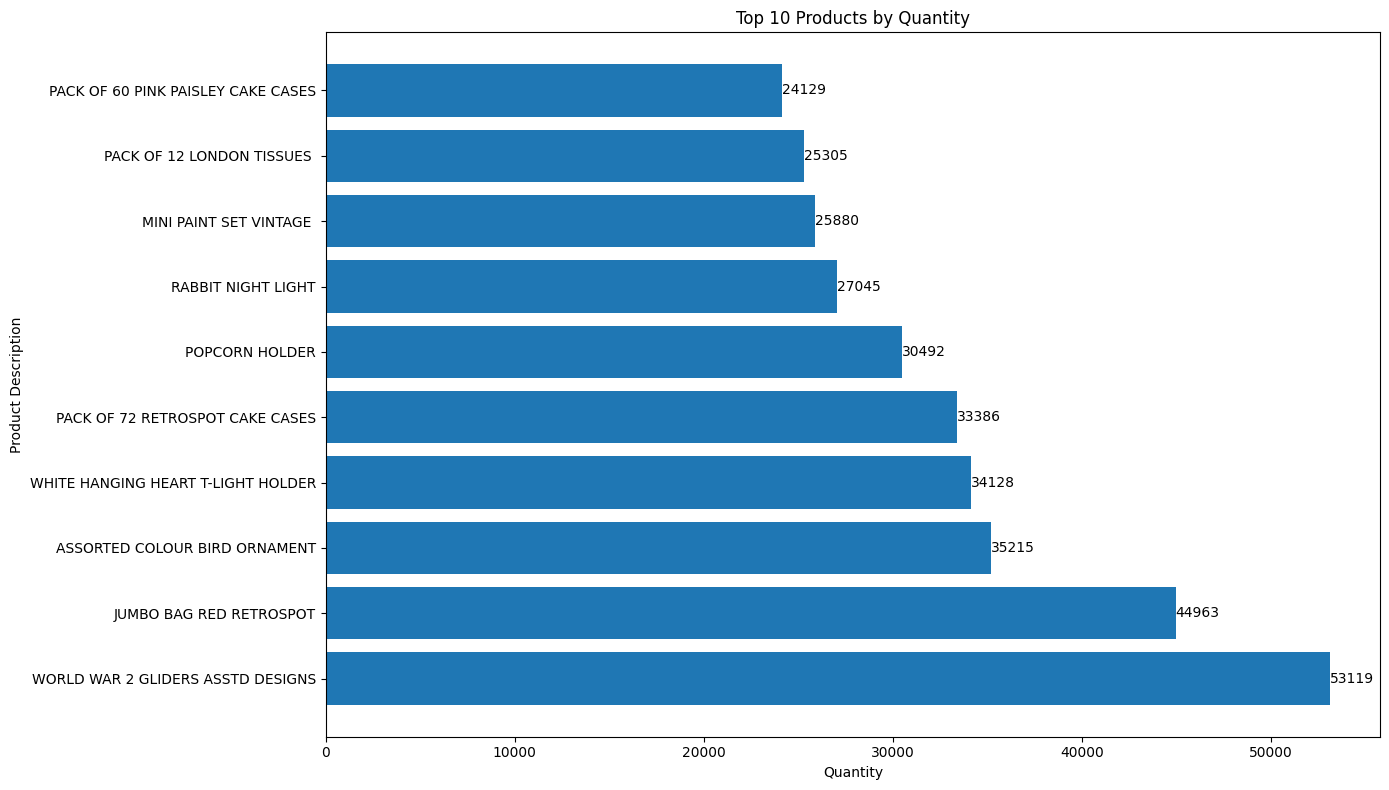

In [24]:
plt.figure(figsize=(14, 8))
plt.barh(quantity_product_top10.index, quantity_product_top10['Quantity'])

plt.title('Top 10 Products by Quantity')
plt.xlabel('Quantity')
plt.ylabel('Product Description')

for i, value in enumerate(quantity_product_top10['Quantity']):
    plt.text(value, i, str(value), ha='left', va='center')

plt.tight_layout()
plt.show()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     401604 non-null  object        
 1   StockCode     401604 non-null  object        
 2   Description   401604 non-null  object        
 3   Quantity      401604 non-null  int64         
 4   InvoiceDate   401604 non-null  datetime64[ns]
 5   UnitPrice     401604 non-null  float64       
 6   CustomerID    401604 non-null  float64       
 7   Country       401604 non-null  object        
 8   Invoice_Date  401604 non-null  datetime64[ns]
 9   Invoice_Time  401604 non-null  object        
 10  TotalPrice    401604 non-null  float64       
 11  Month         401604 non-null  period[M]     
dtypes: datetime64[ns](2), float64(3), int64(1), object(5), period[M](1)
memory usage: 39.8+ MB


In [26]:
#Last date available in the df
df['InvoiceDate'].max()

now = pd.Timestamp(datetime(2011, 12, 9))
print(now)

2011-12-09 00:00:00


# RFM Analysis 。
****RECENCY (R): Days since last purchase 。****
****FREQUENCY (F): Total number of purchases 。****
****MONETARY VALUE (M): Total money this customer spent.****

In [27]:
# RFM Analysis is a marketing technique used to analyze customer behavior based on three factors: 
# We start by grouping the data by customer ID.
RFMScore = df.groupby('CustomerID').agg({
    # For each customer, calculate the number of days since their last purchase (Recency).
    'InvoiceDate': lambda x: (now - x.max()).days,
    # Count the number of invoices for each customer (Frequency).
    'InvoiceNo': lambda x: x.count(),
    # Calculate the total amount spent by each customer (Monetary).
    'TotalPrice': lambda x: x.sum()
})

In [28]:
RFMScore.head()

,InvoiceDate,InvoiceNo,TotalPrice
CustomerID,,,
12346.0,324,2,0.00
12347.0,1,182,4310.00
12348.0,74,31,1797.24
12349.0,17,73,1757.55
12350.0,309,17,334.40


In [29]:
#Renaming the columns for better understanding
RFMScore.rename(columns = {'InvoiceDate':'Recency','InvoiceNo':'Frequency','TotalPrice':'Monetary'},inplace = True)

In [30]:
RFMScore.reset_index()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,324,2,0.00
1,12347.0,1,182,4310.00
2,12348.0,74,31,1797.24
3,12349.0,17,73,1757.55
4,12350.0,309,17,334.40
...,...,...,...,...
4367,18280.0,276,10,180.60
4368,18281.0,179,7,80.82
4369,18282.0,6,13,176.60
4370,18283.0,2,721,2045.53


In [31]:
RFMScore.describe()

,Recency,Frequency,Monetary
count,4372.000000,4372.000000,4372.000000
mean,90.581199,91.858188,1893.531433
std,100.772139,229.223566,8218.696204
min,-1.000000,1.000000,-4287.630000
25%,15.000000,17.000000,291.795000
50%,49.000000,41.000000,644.070000
75%,142.000000,99.250000,1608.335000
max,372.000000,7812.000000,279489.020000


In [32]:
quantiles = RFMScore.quantile(q=[0.25,0.50,0.75])

In [33]:
print(quantiles)

      Recency  Frequency  Monetary
0.25     15.0      17.00   291.795
0.50     49.0      41.00   644.070
0.75    142.0      99.25  1608.335


In [34]:
#converting to dictionary format
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 15.0, 0.5: 49.0, 0.75: 142.0},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 99.25},
 'Monetary': {0.25: 291.795, 0.5: 644.0699999999999, 0.75: 1608.335}}

In [35]:
# Creating a function to group the customers into 4 based on Recency value
# x = value
# p = recency, monetary, frequency
# d = quartiles dict
# d[p][0.25] Extracts the value of p from the dictionary d using quartile indices [0.25], [0.5], and [0.75]
# For Recency, the closer to the last transaction, the better
def Recency_Score(x, p, d):
    if x <= d[p][0.25]:  # If x (Recency) is less than or equal to the 25th percentile, assign a score of 1
        return 1
    elif x <= d[p][0.5]:  # If x (Recency) is less than or equal to the 50th percentile, assign a score of 2
        return 2
    elif x <= d[p][0.75]:  # If x (Recency) is less than or equal to the 75th percentile, assign a score of 3
        return 3
    else:  # Otherwise, assign a score of 4
        return 4


In [36]:
# Creating a function to group the customers into 4 based on Frequency and Monetary values
# Frequency and Monetary: The more transactions and total transaction amount, the better
def FreqMonet_Score(x, p, d):
    if x <= d[p][0.25]:  # If x (Frequency or Monetary) is less than or equal to the 25th percentile, assign a score of 4
        return 4
    elif x <= d[p][0.5]:  # If x (Frequency or Monetary) is less than or equal to the 50th percentile, assign a score of 3
        return 3
    elif x <= d[p][0.75]:  # If x (Frequency or Monetary) is less than or equal to the 75th percentile, assign a score of 2
        return 2
    else:  # Otherwise, assign a score of 1
        return 1

In [37]:
RFMScore.columns

Index(['Recency', 'Frequency', 'Monetary'], dtype='object')

In [38]:
# Applying the created function on the respective columns
# Recency_Score(x,p,d):
# x = value
# p = recency, monetary_value, frequency
# d = quartiles dict
RFMScore['R'] = RFMScore['Recency'].apply(Recency_Score, args = ('Recency',quantiles))
RFMScore['F'] = RFMScore['Frequency'].apply(FreqMonet_Score, args = ('Frequency',quantiles))
RFMScore['M'] = RFMScore['Monetary'].apply(FreqMonet_Score, args = ('Monetary',quantiles))

In [39]:
RFMScore

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,324,2,0.00,4,4,4
12347.0,1,182,4310.00,1,1,1
12348.0,74,31,1797.24,3,3,1
12349.0,17,73,1757.55,2,2,1
12350.0,309,17,334.40,4,4,3
...,...,...,...,...,...,...
18280.0,276,10,180.60,4,4,4
18281.0,179,7,80.82,4,4,4
18282.0,6,13,176.60,1,4,4


In [40]:
#Creating a new field 'RFMValue' to split the customers into 10 segments
RFMScore['RFMValue'] = RFMScore[['R','F','M']].sum(axis = 1)

In [41]:
#Creating a new field 'RFMValue' to split the customers into 10 segments
RFMScore['RFMValue'] 

CustomerID
12346.0    12
12347.0     3
12348.0     7
12349.0     5
12350.0    11
           ..
18280.0    12
18281.0    12
18282.0     9
18283.0     3
18287.0     5
Name: RFMValue, Length: 4372, dtype: int64

In [42]:
RFMScore['RFMGroup'] = RFMScore.R.map(str) + RFMScore.F.map(str) + RFMScore.M.map(str)

In [43]:
RFMScore.reset_index()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMValue,RFMGroup
0,12346.0,324,2,0.00,4,4,4,12,444
1,12347.0,1,182,4310.00,1,1,1,3,111
2,12348.0,74,31,1797.24,3,3,1,7,331
3,12349.0,17,73,1757.55,2,2,1,5,221
4,12350.0,309,17,334.40,4,4,3,11,443
...,...,...,...,...,...,...,...,...,...
4367,18280.0,276,10,180.60,4,4,4,12,444
4368,18281.0,179,7,80.82,4,4,4,12,444
4369,18282.0,6,13,176.60,1,4,4,9,144
4370,18283.0,2,721,2045.53,1,1,1,3,111


In [44]:
#Grouping the 10 segments of customers into 4 groups and naming them
Customer_Level = ['Platinum','Diamond','Gold','Silver']
score_cuts = pd.qcut(RFMScore.RFMValue, q=4, labels=Customer_Level)
RFMScore['Customer_Level'] = score_cuts.values
RFMScore = RFMScore.reset_index()
RFMScore

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMValue,RFMGroup,Customer_Level
0,12346.0,324,2,0.00,4,4,4,12,444,Silver
1,12347.0,1,182,4310.00,1,1,1,3,111,Platinum
2,12348.0,74,31,1797.24,3,3,1,7,331,Diamond
3,12349.0,17,73,1757.55,2,2,1,5,221,Platinum
4,12350.0,309,17,334.40,4,4,3,11,443,Silver
...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,276,10,180.60,4,4,4,12,444,Silver
4368,18281.0,179,7,80.82,4,4,4,12,444,Silver
4369,18282.0,6,13,176.60,1,4,4,9,144,Gold
4370,18283.0,2,721,2045.53,1,1,1,3,111,Platinum


In [45]:
# Displaying the number of customers in each group
#Silver       772
#Gold         980
#Platinum    1261
#Diamond     1326
cust_group = RFMScore['Customer_Level'].value_counts().sort_values()
cust_group

Customer_Level
Silver       781
Gold         985
Platinum    1281
Diamond     1325
Name: count, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


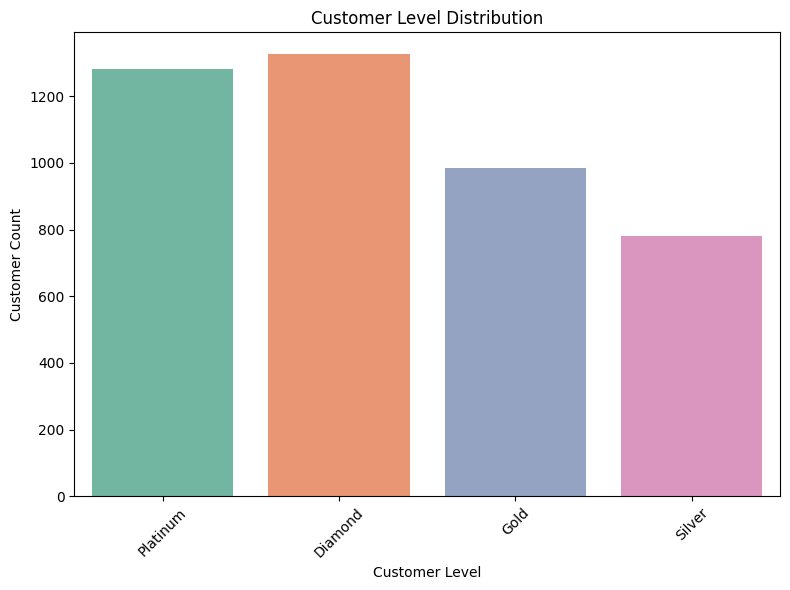

In [46]:
#Displaying the customer groups and their counts in a barchart
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=cust_group.index, y=cust_group.values, palette="Set2")

plt.title('Customer Level Distribution')
plt.xlabel('Customer Level')
plt.ylabel('Customer Count')

plt.xticks(rotation=45)

#for i, val in enumerate(cust_group.values): ax.text(i, val + 5, str(val), ha='center', va='bottom')

plt.tight_layout()
plt.show()